In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import matplotlib.dates as mdates
from sklearn.preprocessing import scale
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import signal
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf
import waipy
warnings.filterwarnings('ignore')

In [44]:
niamey = pd.read_csv('Group_9.csv')#whole dataset
niameypre = niamey[['Date','PRED']]#only for precipitation
niameytmp = niamey[['Date','TMPD']]#only for temperature
niameypre['Date']=pd.to_datetime(niameypre['Date'])#convert to date
niameytmp['Date']=pd.to_datetime(niameytmp['Date'])#convert to date

# 1-

## Precipitation

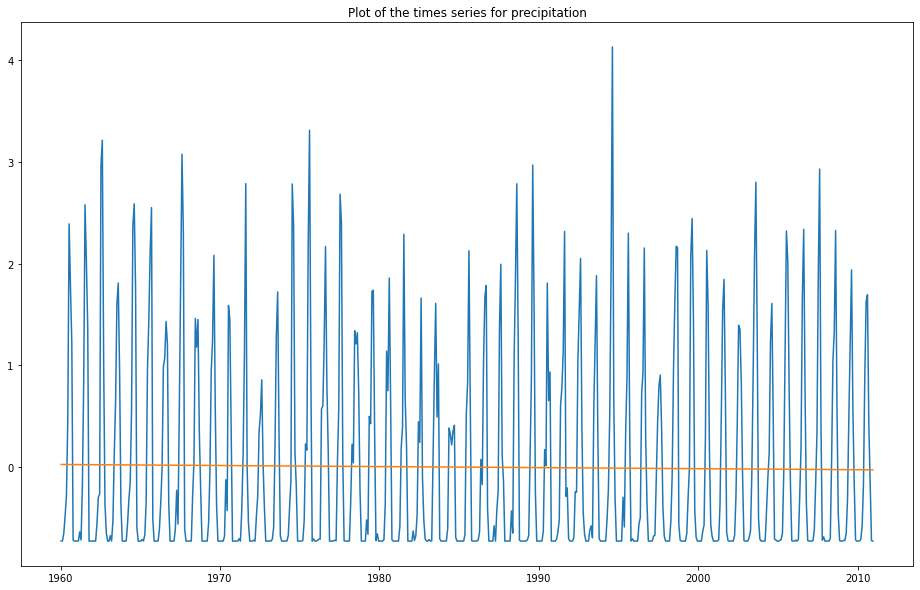

In [72]:
plt.figure(figsize=(16,10))
plt.title('Plot of the times series for precipitation')
plt.plot(niameypre['Date'],niameypre['PRED'])
x = np.arange(niameypre['Date'].size)
fit = np.polyfit(x, niameypre['PRED'], deg=1)
fit_function = np.poly1d(fit)
plt.plot(niameypre['Date'], fit_function(x))
plt.savefig('pypred.png')
plt.show()

## Temperature

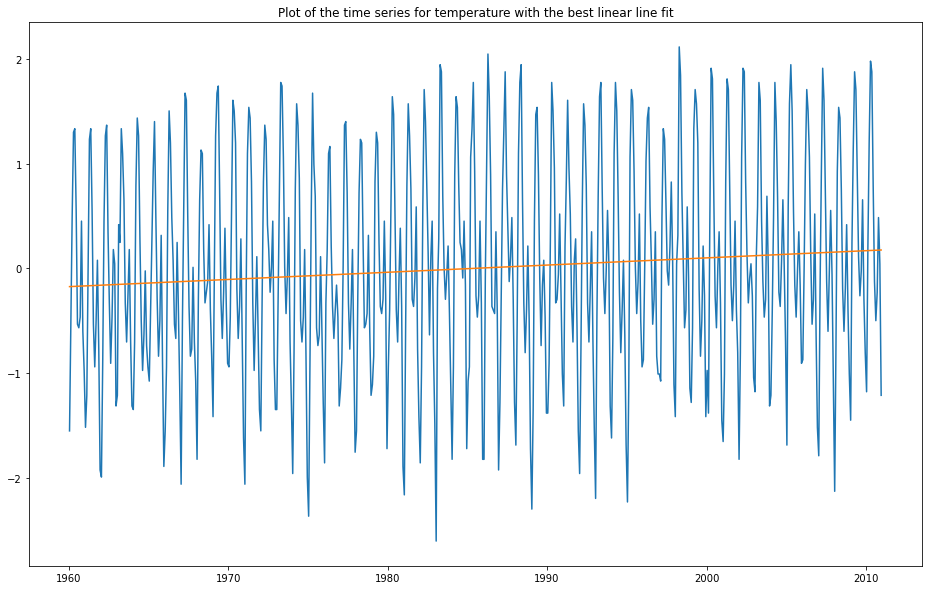

In [73]:
plt.figure(figsize=(16,10))
plt.title('Plot of the time series for temperature with the best linear line fit')
plt.plot(niameytmp['Date'],niameytmp['TMPD'])
x = np.arange(niameypre['Date'].size)
fit = np.polyfit(x, niameytmp['TMPD'], deg=1)
fit_function = np.poly1d(fit)
plt.plot(niameytmp['Date'], fit_function(x))

plt.savefig('pytemp.png')
plt.show()

# 2-

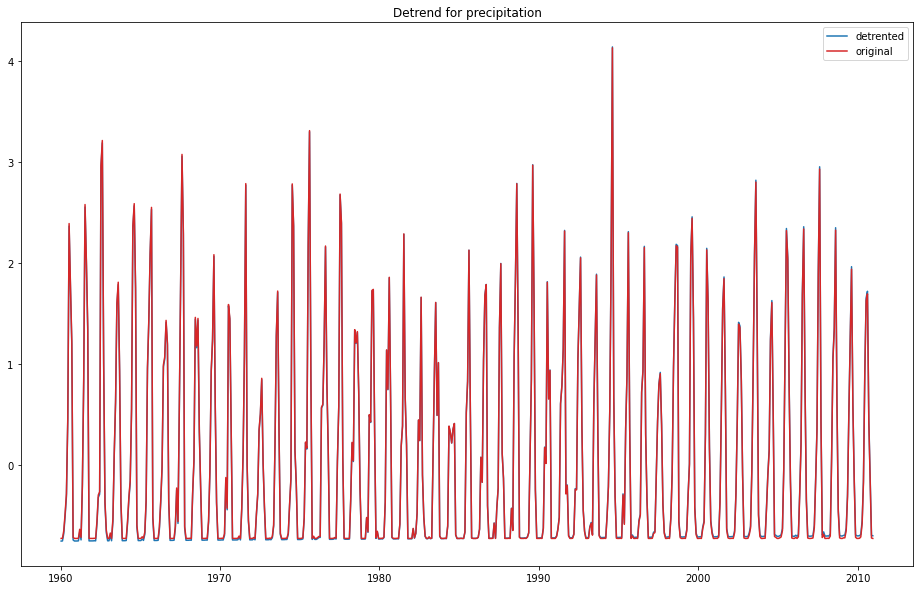

In [74]:
plt.figure(figsize=(16,10))
plt.title('Detrend for precipitation')
detrendedpre = signal.detrend(niameypre['PRED'].values)
plt.plot(niameypre['Date'],detrendedpre,color='tab:blue',label='detrented')
plt.plot(niameypre['Date'],niameypre['PRED'],color='tab:red',label='original')
plt.legend()
plt.savefig('pydepred.png')
plt.show()

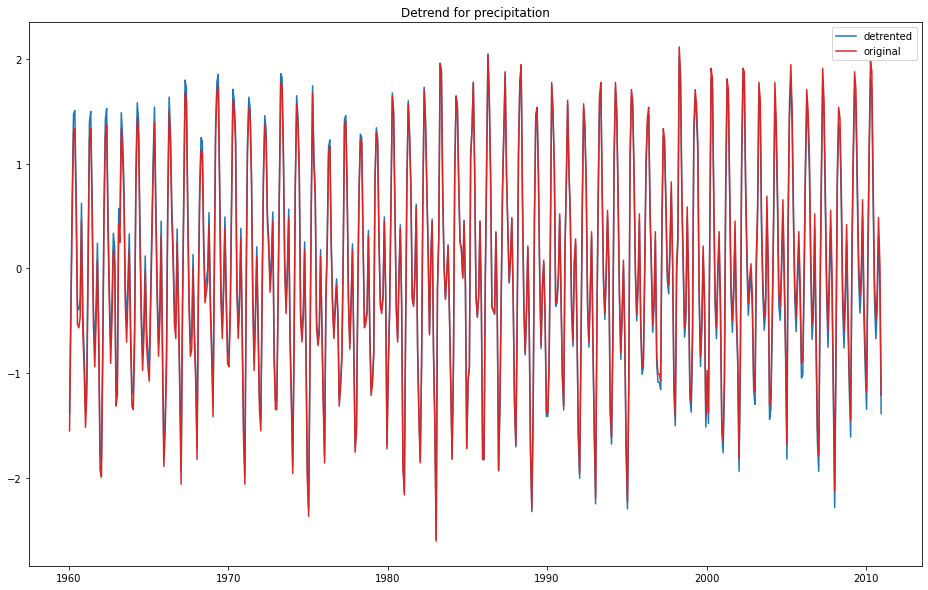

In [75]:
plt.figure(figsize=(16,10))
plt.title('Detrend for precipitation')
detrendedtmp = signal.detrend(niameytmp['TMPD'].values)
plt.plot(niameytmp['Date'],detrendedtmp,color='tab:blue',label='detrented')
plt.plot(niameytmp['Date'],niameytmp['TMPD'],color='tab:red',label='original')
plt.legend()
plt.savefig('pydetemp.png')
plt.show()

# 3-

## Standardized each dataset

In [49]:
niameypre['PRED']=scale(niameypre['PRED'].values) 
niameytmp['TMPD']=scale(niameytmp['TMPD'].values)

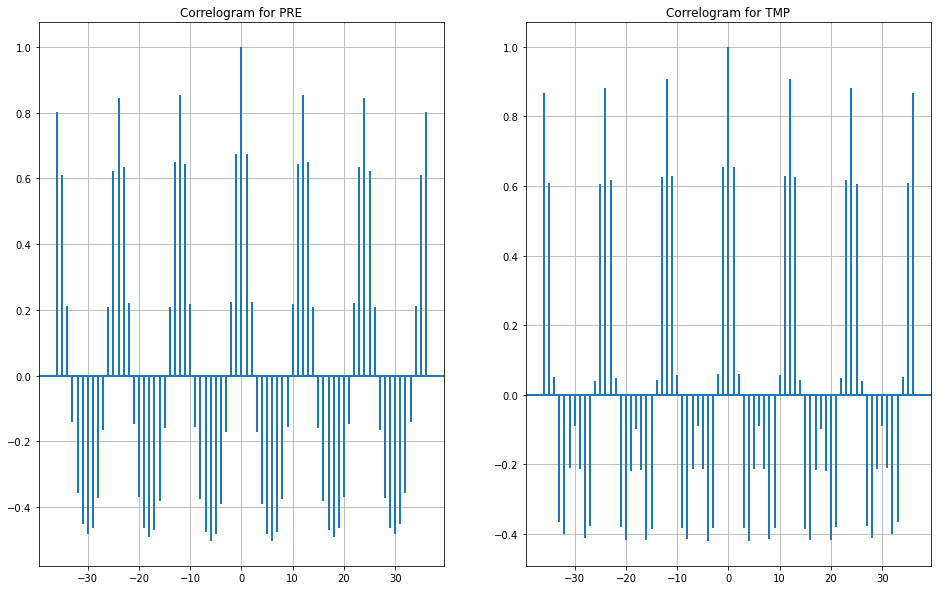

In [66]:

fig, [ax2,ax3] = plt.subplots(1, 2, sharex=True,figsize=(16,10))

ax2.acorr(niameypre['PRED'], usevlines=True, normed=True, maxlags=36, lw=2)
ax2.grid(True)
ax2.set_title('Correlogram for PRE')

ax3.acorr(niameytmp['TMPD'], usevlines=True, normed=True, maxlags=36, lw=2)
ax3.grid(True)
ax3.set_title('Correlogram for TMP')
plt.savefig('pycorr.png')
plt.show()


# 4-

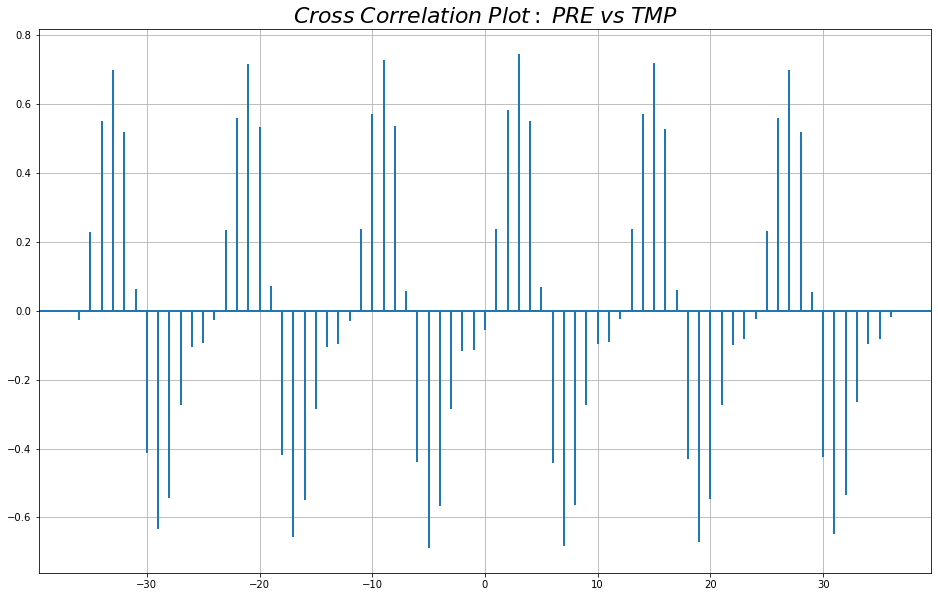

In [67]:
plt.figure(figsize=(16,10))
plt.xcorr(niameypre['PRED'], niameytmp['TMPD'], usevlines=True, maxlags=36, normed=True, lw=2)
plt.grid(True)
plt.title('$Cross\; Correlation\; Plot:\; PRE\; vs\; TMP$', fontsize=22)
plt.savefig('pycross.png')
plt.show()

# Task 4

# 1- Spectral analysis for precipitation

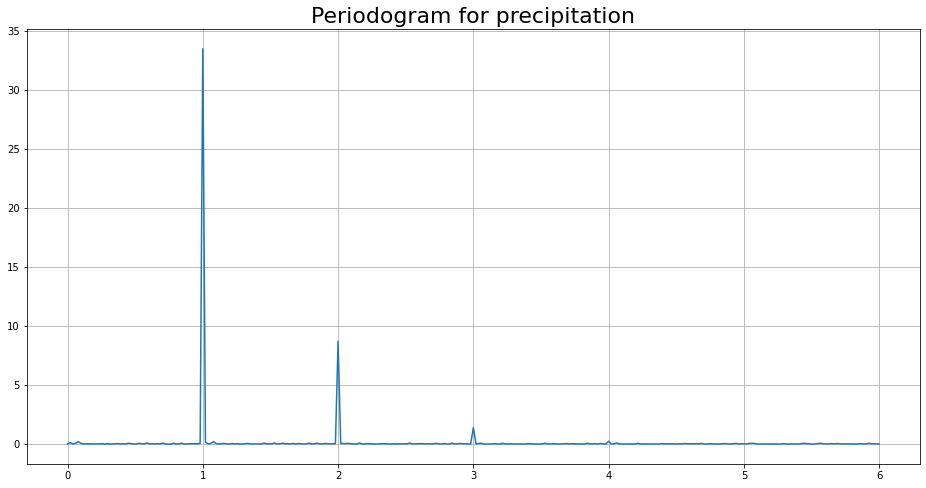

In [52]:
f, Pxx_den = signal.periodogram(niameypre['PRED'],12)
plt.figure(figsize=(16,8))
plt.plot(f,Pxx_den)
plt.grid(True)
plt.title('Periodogram for precipitation', fontsize=22)
plt.show()

### 6 months moving average

In [53]:
df = pd.DataFrame(niameypre['PRED'].values,index=niameypre['Date'].values,columns=['PRED'])

In [54]:
import pandas_ta as ta
df.ta.sma(close='PRED', length=6, append=True)

1960-01-16         NaN
1960-02-15         NaN
1960-03-16         NaN
1960-04-16         NaN
1960-05-16         NaN
                ...   
2010-08-16    0.459235
2010-09-16    0.648567
2010-10-16    0.720399
2010-11-16    0.629313
2010-12-16    0.358275
Name: SMA_6, Length: 612, dtype: float64

In [55]:
df = df.dropna()

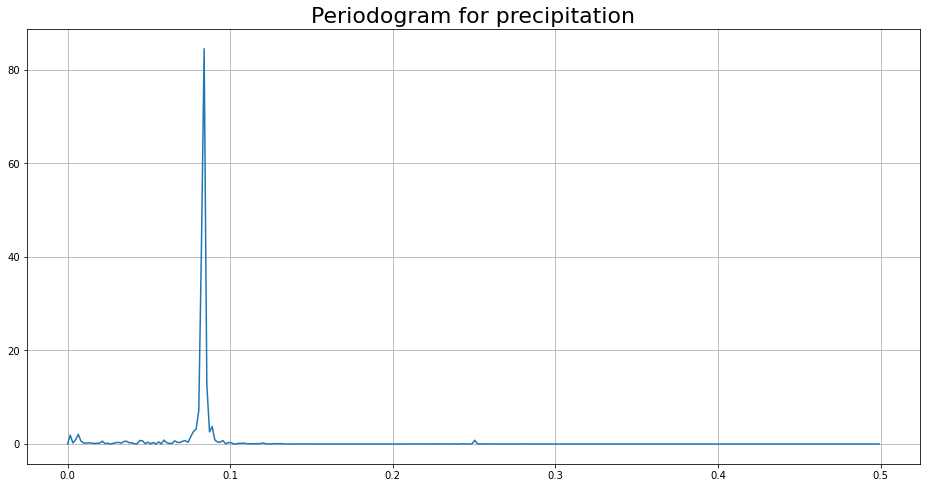

In [56]:
f, Pxx_den = signal.periodogram(df['SMA_6'],1)
plt.figure(figsize=(16,8))
plt.plot(f,Pxx_den)
plt.grid(True)
plt.title('Periodogram for precipitation', fontsize=22)
plt.show()

# 2- 

### With Morlet

In [57]:
from __future__ import division
import numpy
from matplotlib import pyplot

import pycwt as wavelet
from pycwt.helpers import find

In [58]:
# url = 'http://paos.colorado.edu/research/wavelets/wave_idl/nino3sst.txt'
dat = detrendedpre #detrented precipitation
title = 'Wavelet Analysis'
label = 'NINO3 SST'
units = 'mm'
t0 = 1960.0
dt = 1/12  # In years
N = dat.size
t = np.arange(0, N) * dt + t0

### remove the trend and normalized

In [59]:
std = dat.std()  # Standard deviation
var = std ** 2  # Variance
dat_norm = dat / std  # Normalized dataset

### parameter of wavelet command

In [60]:
mother = wavelet.Morlet(6)
s0 = 2 * dt  # Starting scale, in this case 2 * 0.25 years = 6 months
dj = 1 / 12  # Twelve sub-octaves per octaves
J = 7 / dj  # Seven powers of two with dj sub-octaves
alpha, _, _ = wavelet.ar1(dat)  # Lag-1 autocorrelation for red noise

wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm, dt, dj, s0, J,
                                                      mother)
iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std

power = (numpy.abs(wave)) ** 2
fft_power = numpy.abs(fft) ** 2
period = 1 / freqs

power /= scales[:, None]

signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig95 = numpy.ones([1, N]) * signif[:, None]
sig95 = power / sig95

glbl_power = power.mean(axis=1)
dof = N - scales  # Correction for padding at edges
glbl_signif, tmp = wavelet.significance(var, dt, scales, 1, alpha,
                                        significance_level=0.95, dof=dof,
                                        wavelet=mother)

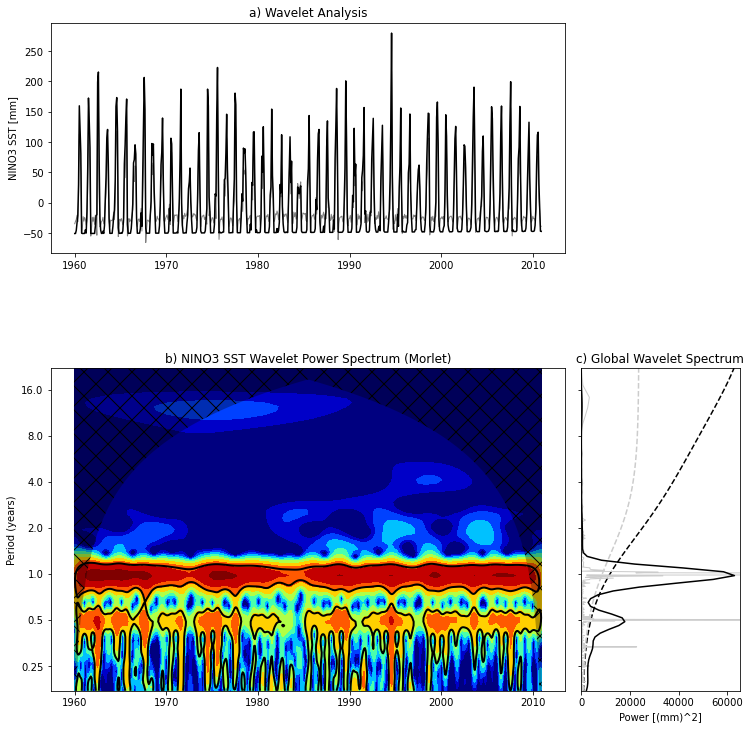

In [61]:
# Prepare the figure
pyplot.close('all')
pyplot.ioff()
figprops = dict(figsize=(11, 16), dpi=72)
fig = pyplot.figure(**figprops)

#First sub-plot, the original time series anomaly and inverse wavelet
# transform.
ax = pyplot.axes([0.1, 0.75, 0.65, 0.2])
ax.plot(t, iwave, '-', linewidth=1, color=[0.5, 0.5, 0.5])
ax.plot(t, dat, 'k', linewidth=1.5)
ax.set_title('a) {}'.format(title))
ax.set_ylabel(r'{} [{}]'.format(label, units))

# Second sub-plot, the normalized wavelet power spectrum and significance
# level contour lines and cone of influece hatched area. Note that period
# scale is logarithmic.
bx = pyplot.axes([0.1, 0.37, 0.65, 0.28], sharex=ax)
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
bx.contourf(t, numpy.log2(period), numpy.log2(power), numpy.log2(levels),
            extend='both', cmap=pyplot.cm.jet)
extent = [t.min(), t.max(), 0, max(period)]
bx.contour(t, numpy.log2(period), sig95, [-99, 1], colors='k', linewidths=2,
           extent=extent)
bx.fill(numpy.concatenate([t, t[-1:] + dt, t[-1:] + dt,
                           t[:1] - dt, t[:1] - dt]),
        numpy.concatenate([numpy.log2(coi), [1e-9], numpy.log2(period[-1:]),
                           numpy.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
bx.set_title('b) {} Wavelet Power Spectrum ({})'.format(label, mother.name))
bx.set_ylabel('Period (years)')
#
Yticks = 2 ** numpy.arange(numpy.ceil(numpy.log2(period.min())),
                           numpy.ceil(numpy.log2(period.max())))
bx.set_yticks(numpy.log2(Yticks))
bx.set_yticklabels(Yticks)

# Third sub-plot, the global wavelet and Fourier power spectra and theoretical
# noise spectra. Note that period scale is logarithmic.
cx = pyplot.axes([0.77, 0.37, 0.2, 0.28], sharey=bx)
cx.plot(glbl_signif, numpy.log2(period), 'k--')
cx.plot(var * fft_theor, numpy.log2(period), '--', color='#cccccc')
cx.plot(var * fft_power, numpy.log2(1./fftfreqs), '-', color='#cccccc',
        linewidth=1.)
cx.plot(var * glbl_power, numpy.log2(period), 'k-', linewidth=1.5)
cx.set_title('c) Global Wavelet Spectrum')
cx.set_xlabel(r'Power [({})^2]'.format(units))
# cx.set_xlim([0, glbl_power.max() + var])
cx.set_xlim([0, 65000])
cx.set_ylim(numpy.log2([period.min(), period.max()]))
cx.set_yticks(numpy.log2(Yticks))
cx.set_yticklabels(Yticks)
pyplot.setp(cx.get_yticklabels(), visible=False)

plt.savefig('pymorlet.png')
pyplot.show()


# Paul

In [62]:
mother = wavelet.Paul(6)
s0 = 2 * dt  # Starting scale, in this case 2 * 0.25 years = 6 months
dj = 1 / 12  # Twelve sub-octaves per octaves
J = 7 / dj  # Seven powers of two with dj sub-octaves
alpha, _, _ = wavelet.ar1(dat)  # Lag-1 autocorrelation for red noise

wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm, dt, dj, s0, J,
                                                      mother)
iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std

power = (numpy.abs(wave)) ** 2
fft_power = numpy.abs(fft) ** 2
period = 1 / freqs

power /= scales[:, None]

signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig95 = numpy.ones([1, N]) * signif[:, None]
sig95 = power / sig95

glbl_power = power.mean(axis=1)
dof = N - scales  # Correction for padding at edges
glbl_signif, tmp = wavelet.significance(var, dt, scales, 1, alpha,
                                        significance_level=0.95, dof=dof,
                                        wavelet=mother)

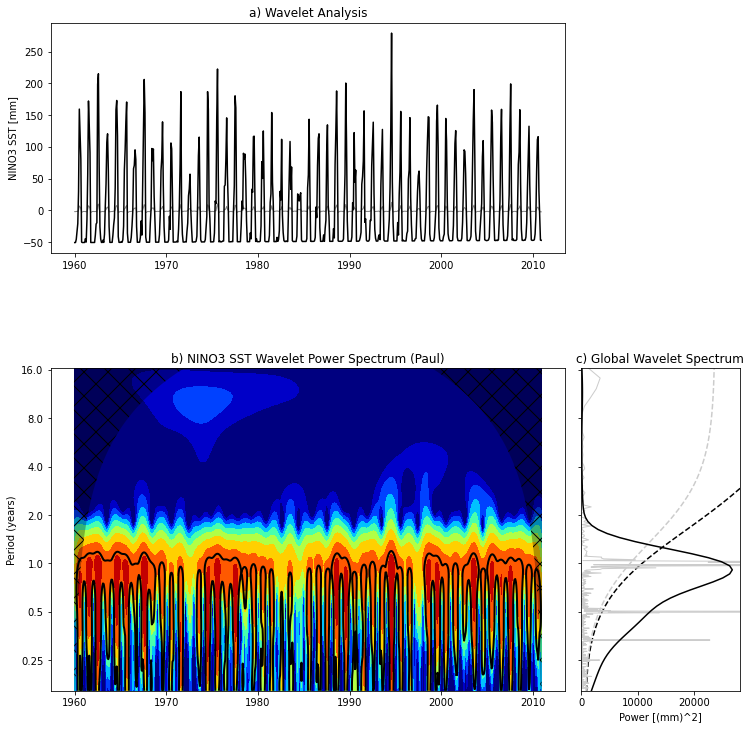

In [63]:
# Prepare the figure
pyplot.close('all')
pyplot.ioff()
figprops = dict(figsize=(11, 16), dpi=72)
fig = pyplot.figure(**figprops)

#First sub-plot, the original time series anomaly and inverse wavelet
# transform.
ax = pyplot.axes([0.1, 0.75, 0.65, 0.2])
ax.plot(t, iwave, '-', linewidth=1, color=[0.5, 0.5, 0.5])
ax.plot(t, dat, 'k', linewidth=1.5)
ax.set_title('a) {}'.format(title))
ax.set_ylabel(r'{} [{}]'.format(label, units))

# Second sub-plot, the normalized wavelet power spectrum and significance
# level contour lines and cone of influece hatched area. Note that period
# scale is logarithmic.
bx = pyplot.axes([0.1, 0.37, 0.65, 0.28], sharex=ax)
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
bx.contourf(t, numpy.log2(period), numpy.log2(power), numpy.log2(levels),
            extend='both', cmap=pyplot.cm.jet)
extent = [t.min(), t.max(), 0, max(period)]
bx.contour(t, numpy.log2(period), sig95, [-99, 1], colors='k', linewidths=2,
           extent=extent)
bx.fill(numpy.concatenate([t, t[-1:] + dt, t[-1:] + dt,
                           t[:1] - dt, t[:1] - dt]),
        numpy.concatenate([numpy.log2(coi), [1e-9], numpy.log2(period[-1:]),
                           numpy.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
bx.set_title('b) {} Wavelet Power Spectrum ({})'.format(label, mother.name))
bx.set_ylabel('Period (years)')
#
Yticks = 2 ** numpy.arange(numpy.ceil(numpy.log2(period.min())),
                           numpy.ceil(numpy.log2(period.max())))
bx.set_yticks(numpy.log2(Yticks))
bx.set_yticklabels(Yticks)

# Third sub-plot, the global wavelet and Fourier power spectra and theoretical
# noise spectra. Note that period scale is logarithmic.
cx = pyplot.axes([0.77, 0.37, 0.2, 0.28], sharey=bx)
cx.plot(glbl_signif, numpy.log2(period), 'k--')
cx.plot(var * fft_theor, numpy.log2(period), '--', color='#cccccc')
cx.plot(var * fft_power, numpy.log2(1./fftfreqs), '-', color='#cccccc',
        linewidth=1.)
cx.plot(var * glbl_power, numpy.log2(period), 'k-', linewidth=1.5)
cx.set_title('c) Global Wavelet Spectrum')
cx.set_xlabel(r'Power [({})^2]'.format(units))
# cx.set_xlim([0, glbl_power.max() + var])
cx.set_xlim([0, 28000])
cx.set_ylim(numpy.log2([period.min(), period.max()]))
cx.set_yticks(numpy.log2(Yticks))
cx.set_yticklabels(Yticks)
pyplot.setp(cx.get_yticklabels(), visible=False)

plt.savefig('pypaul.png')
pyplot.show()


# Gaussian 

In [64]:
mother = wavelet.DOG(6)
s0 = 2 * dt  # Starting scale, in this case 2 * 0.25 years = 6 months
dj = 1 / 12  # Twelve sub-octaves per octaves
J = 7 / dj  # Seven powers of two with dj sub-octaves
alpha, _, _ = wavelet.ar1(dat)  # Lag-1 autocorrelation for red noise

wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm, dt, dj, s0, J,
                                                      mother)
iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std

power = (numpy.abs(wave)) ** 2
fft_power = numpy.abs(fft) ** 2
period = 1 / freqs

power /= scales[:, None]

signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig95 = numpy.ones([1, N]) * signif[:, None]
sig95 = power / sig95

glbl_power = power.mean(axis=1)
dof = N - scales  # Correction for padding at edges
glbl_signif, tmp = wavelet.significance(var, dt, scales, 1, alpha,
                                        significance_level=0.95, dof=dof,
                                        wavelet=mother)

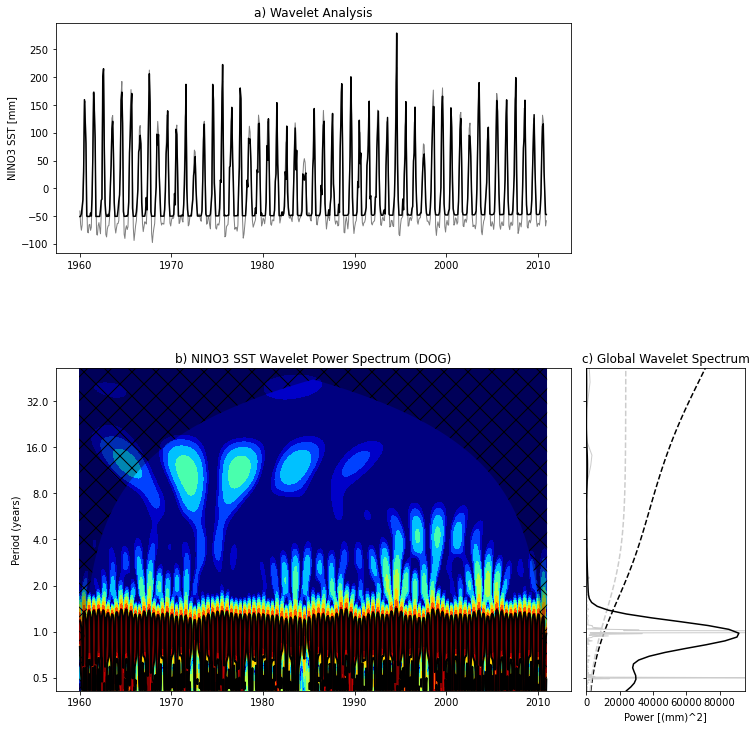

In [78]:
# Prepare the figure
pyplot.close('all')
pyplot.ioff()
figprops = dict(figsize=(11, 16), dpi=72)
fig = pyplot.figure(**figprops)

#First sub-plot, the original time series anomaly and inverse wavelet
# transform.
ax = pyplot.axes([0.1, 0.75, 0.65, 0.2])
ax.plot(t, iwave, '-', linewidth=1, color=[0.5, 0.5, 0.5])
ax.plot(t, dat, 'k', linewidth=1.5)
ax.set_title('a) {}'.format(title))
ax.set_ylabel(r'{} [{}]'.format(label, units))

# Second sub-plot, the normalized wavelet power spectrum and significance
# level contour lines and cone of influece hatched area. Note that period
# scale is logarithmic.
bx = pyplot.axes([0.1, 0.37, 0.65, 0.28], sharex=ax)
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
bx.contourf(t, numpy.log2(period), numpy.log2(power), numpy.log2(levels),
            extend='both', cmap=pyplot.cm.jet)
extent = [t.min(), t.max(), 0, max(period)]
bx.contour(t, numpy.log2(period), sig95, [-99, 1], colors='k', linewidths=2,
           extent=extent)
bx.fill(numpy.concatenate([t, t[-1:] + dt, t[-1:] + dt,
                           t[:1] - dt, t[:1] - dt]),
        numpy.concatenate([numpy.log2(coi), [1e-9], numpy.log2(period[-1:]),
                           numpy.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
bx.set_title('b) {} Wavelet Power Spectrum ({})'.format(label, mother.name))
bx.set_ylabel('Period (years)')
#
Yticks = 2 ** numpy.arange(numpy.ceil(numpy.log2(period.min())),
                           numpy.ceil(numpy.log2(period.max())))
bx.set_yticks(numpy.log2(Yticks))
bx.set_yticklabels(Yticks)

# Third sub-plot, the global wavelet and Fourier power spectra and theoretical
# noise spectra. Note that period scale is logarithmic.
cx = pyplot.axes([0.77, 0.37, 0.2, 0.28], sharey=bx)
cx.plot(glbl_signif, numpy.log2(period), 'k--')
cx.plot(var * fft_theor, numpy.log2(period), '--', color='#cccccc')
cx.plot(var * fft_power, numpy.log2(1./fftfreqs), '-', color='#cccccc',
        linewidth=1.)
cx.plot(var * glbl_power, numpy.log2(period), 'k-', linewidth=1.5)
cx.set_title('c) Global Wavelet Spectrum')
cx.set_xlabel(r'Power [({})^2]'.format(units))
# cx.set_xlim([0, glbl_power.max() + var])
cx.set_xlim([0, 95000])
cx.set_ylim(numpy.log2([period.min(), period.max()]))
cx.set_yticks(numpy.log2(Yticks))
cx.set_yticklabels(Yticks)
pyplot.setp(cx.get_yticklabels(), visible=False)

plt.savefig('pydog.png')
pyplot.show()
